In [1]:
# pip install pyathena

In [2]:
# pip install prettytable

In [3]:
import boto3
import pandas as pd
import numpy as np
import sagemaker
from pyathena import connect
from prettytable import PrettyTable 

import matplotlib.pyplot as plt

## Pre-Processing

In [4]:
# create athena database
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

In [5]:
ingest_create_athena_db_passed = False

In [6]:
# set a database name
database_name = "watersd"

In [7]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [8]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [9]:
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement)

CREATE DATABASE IF NOT EXISTS watersd


In [10]:
water_dir = 's3://waterteam1/raw_files'

In [11]:
# SQL statement to execute the analyte tests drinking water table

table_name ='oci_2015_datasd'
pd.read_sql(f'DROP TABLE IF EXISTS {database_name}.{table_name}', conn)


create_table = f"""
CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name}(
                seg_id string,
                oci float,
                street string,
                street_from string,
                street_to string,
                seg_length_ft float,
                seg_width_ft float,
                func_class string,
                pvm_class string,
                area_sq_ft float,
                oci_desc string,
                oci_wt float
                )
                
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                LOCATION '{water_dir}/{table_name}'
                TBLPROPERTIES ('skip.header.line.count'='1')
"""

pd.read_sql(create_table, conn)

pd.read_sql(f'SELECT * FROM {database_name}.{table_name} LIMIT 5', conn)

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,oci_desc,oci_wt
0,SA-000003,65.14,ALLEY,,,772.7258,30.0,Alley,PCC Jointed Concrete,23181.773,Fair,1510060.80
1,SA-000004,67.45,ALLEY,,,196.0025,30.0,Alley,PCC Jointed Concrete,5880.075,Fair,396611.06
2,SA-000005,70.88,ALLEY,,,395.0049,30.0,Alley,PCC Jointed Concrete,11850.147,Good,839938.44
3,SA-000006,84.00,ALLEY,,,192.0025,30.0,Alley,PCC Jointed Concrete,5760.075,Good,483846.30
4,SA-000008,79.24,ALLEY,,,251.7540,30.0,Alley,PCC Jointed Concrete,7552.620,Good,598469.60


In [12]:
# SQL statement to execute the analyte tests drinking water table

table_name2 ='sd_paving_datasd'
pd.read_sql(f'DROP TABLE IF EXISTS {database_name}.{table_name2}', conn)


create_table = f"""
CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name2}(
                pve_id int,
                seg_id string,
                project_id string,
                title string,
                project_manager string,
                project_manager_phone string,
                status string,
                type string,
                resident_engineer string,
                address_street string,
                street_from string,
                street_to string,
                seg_cd int,
                length int,
                width int,
                date_moratorium date,
                date_start date,
                date_end date,
                paving_miles float
                )
                
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                LOCATION '{water_dir}/{table_name2}'
                TBLPROPERTIES ('skip.header.line.count'='1')
"""

pd.read_sql(create_table, conn)

pd.read_sql(f'SELECT * FROM {database_name}.{table_name2} LIMIT 5', conn)

,pve_id,seg_id,project_id,title,project_manager,project_manager_phone,status,type,resident_engineer,address_street,street_from,street_to,seg_cd,length,width,date_moratorium,date_start,date_end,paving_miles
0,1073577074,SA-000319,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Overlay,ECP,ALLEY,,,2,0,NaN,2019-02-02,2019-02-02,2019-02-02,0.000000
1,1792486183,SA-000345,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,,,2,938,30.0,2019-01-30,2019-01-30,2019-01-30,0.177652
2,1173780646,SA-000375,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,,,2,674,30.0,2018-08-01,2018-08-01,2018-08-01,0.127652
3,1276790298,SA-000378,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,,,2,658,30.0,2018-08-01,2018-08-01,2018-08-01,0.124621
4,27170959,SA-001081,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Concrete,ECP,ALLEY,,,9,680,30.0,None,2020-08-13,2020-08-13,0.128788


In [13]:
# SQL statement to execute the analyte tests drinking water table

table_name3 ='traffic_counts_datasd'
pd.read_sql(f'DROP TABLE IF EXISTS {database_name}.{table_name3}', conn)


create_table = f"""
CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name3}(
                id string,
                street_name string,
                limits string,
                northbound_count int,
                southbound_count int,
                eastbound_count int,
                westbound_count int,
                total_count int,
                file_no string,
                date_count date
                )
                
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                LOCATION '{water_dir}/{table_name3}'
                TBLPROPERTIES ('skip.header.line.count'='1')
"""

pd.read_sql(create_table, conn)

pd.read_sql(f'SELECT * FROM {database_name}.{table_name3} LIMIT 5', conn)

,id,street_name,limits,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,date_count
0,01AV018207,01 AV,A ST - ASH ST,18010,None,None,None,18010,0182-07,2007-03-13
1,01AV015210,01 AV,A ST - ASH ST,20060,None,None,None,20060,0152-10,2010-03-18
2,01AV018213,01 AV,A ST - ASH ST,19597,None,None,None,19597,0182-13,2013-03-12
3,01AV007721,01 AV,A ST - ASH ST,10640,None,None,None,10640,0077-21,2021-03-10
4,01AV088812,01 AV,ASH ST - BEECH ST,2298,None,None,None,2298,0888-12,2012-12-11


In [14]:
statement = "SHOW DATABASES"
df_show = pd.read_sql(statement, conn)
df_show.head(5)

,database_name
0,default
1,watersd


In [15]:
if database_name in df_show.values:
    ingest_create_athena_db_passed = True

In [16]:
%store ingest_create_athena_db_passed

Stored 'ingest_create_athena_db_passed' (bool)


In [17]:
pd.read_sql(f'SELECT * FROM {database_name}.{table_name} t1 INNER JOIN {database_name}.{table_name2} t2 ON t1.seg_id = t2.seg_id LIMIT 5', conn)

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,...,address_street,street_from,street_to,seg_cd,length,width,date_moratorium,date_start,date_end,paving_miles
0,SA-000345,34.14,ALLEY,,,937.9261,30.0,Alley,AC Improved,28137.783,...,ALLEY,,,2,938,30,2019-01-30,2019-01-30,2019-01-30,0.177652
1,SA-000375,97.25,ALLEY,,,673.3209,30.0,Alley,PCC Jointed Concrete,20199.627,...,ALLEY,,,2,674,30,2018-08-01,2018-08-01,2018-08-01,0.127652
2,SA-000378,62.67,ALLEY,,,657.2000,30.0,Alley,PCC Jointed Concrete,19716.000,...,ALLEY,,,2,658,30,2018-08-01,2018-08-01,2018-08-01,0.124621
3,SA-001081,68.86,ALLEY,,,679.1060,30.0,Alley,PCC Jointed Concrete,20373.180,...,ALLEY,,,9,680,30,None,2020-08-13,2020-08-13,0.128788
4,SA-001083,28.67,ALLEY,,,660.0917,30.0,Alley,PCC Jointed Concrete,19802.752,...,ALLEY,,,9,661,30,None,2020-07-31,2020-07-31,0.125189


In [18]:
df = pd.read_sql(f'SELECT * FROM (SELECT * FROM {database_name}.{table_name} \
                           t1 INNER JOIN {database_name}.{table_name2} t2 \
                           ON t1.seg_id = t2.seg_id) m1 LEFT JOIN (SELECT street_name, \
                                                                   SUM(total_count) total_count \
                                                                   FROM {database_name}.{table_name3} \
                                                                   GROUP BY street_name) t3 \
                           ON m1.address_street = t3.street_name', conn)

In [19]:
df.head(5)

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,...,street_to,seg_cd,length,width,date_moratorium,date_start,date_end,paving_miles,street_name,total_count
0,SA-000345,34.14,ALLEY,,,937.9261,30.0,Alley,AC Improved,28137.783,...,,2,938,30,2019-01-30,2019-01-30,2019-01-30,0.177652,None,NaN
1,SA-000375,97.25,ALLEY,,,673.3209,30.0,Alley,PCC Jointed Concrete,20199.627,...,,2,674,30,2018-08-01,2018-08-01,2018-08-01,0.127652,None,NaN
2,SA-000378,62.67,ALLEY,,,657.2000,30.0,Alley,PCC Jointed Concrete,19716.000,...,,2,658,30,2018-08-01,2018-08-01,2018-08-01,0.124621,None,NaN
3,SA-001081,68.86,ALLEY,,,679.1060,30.0,Alley,PCC Jointed Concrete,20373.180,...,,9,680,30,None,2020-08-13,2020-08-13,0.128788,None,NaN
4,SA-001083,28.67,ALLEY,,,660.0917,30.0,Alley,PCC Jointed Concrete,19802.752,...,,9,661,30,None,2020-07-31,2020-07-31,0.125189,None,NaN


In [20]:
df = df.drop(columns=['street_from', 'street_to'])
# df.to_csv('sd_roads_dataframe.csv')

## Exploratory Data Analysis (EDA)

In [21]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1], '\n')

data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.assign(Null_Values = 
                               df.isnull().sum())
data_types.reset_index(inplace = True)
data_types.rename(columns={0:'Data Type',
                          'index': 'Column/Variable',
                          'Null_Values': "# of Nulls"})

Number of Rows: 23005
Number of Columns: 29 



,Column/Variable,Data Type,# of Nulls
0,seg_id,object,0
1,oci,float64,0
2,street,object,0
3,seg_length_ft,float64,0
4,seg_width_ft,float64,0
5,func_class,object,0
6,pvm_class,object,0
7,area_sq_ft,float64,0
8,oci_desc,object,0
9,oci_wt,float64,0


In [22]:
df = df.loc[:,~df.columns.duplicated()]

### Bias Exploration
To explore potential areas of bias, we will endeavor to trace class imbalance on the target feature of "oci_desc"

In [23]:
oci_desc_fair = df['oci_desc'].value_counts()['Fair']
oci_desc_good = df['oci_desc'].value_counts()['Good']
oci_desc_poor = df['oci_desc'].value_counts()['Poor']
oci_desc_total = oci_desc_fair  + oci_desc_good + oci_desc_poor

table1 = PrettyTable() # build a table
table1.field_names = ['Fair Condition', 'Good Condition', 
                      'Poor Condition', 'Total']
table1.add_row([oci_desc_fair, oci_desc_good, oci_desc_poor, 
                oci_desc_total])
print(table1)

+----------------+----------------+----------------+-------+
| Fair Condition | Good Condition | Poor Condition | Total |
+----------------+----------------+----------------+-------+
|      6105      |     15758      |      1142      | 23005 |
+----------------+----------------+----------------+-------+


In [24]:
perc_good = oci_desc_good /(oci_desc_total) 
perc_fair = oci_desc_fair /(oci_desc_total)
perc_poor = oci_desc_poor /(oci_desc_total)
print(round(perc_good, 2)*100, '% of streets '
                       'are in good condition ')
print(round(perc_fair, 2)*100, '% of streets '
                       'are in fair condition ')
print(round(perc_poor, 2)*100, '% of streets '
                       'are in poor condition ')

68.0 % of streets are in good condition 
27.0 % of streets are in fair condition 
5.0 % of streets are in poor condition 


Considerably more than half of the streets are in good condition. A little less than a third are in fair condition. Only 5% are in poor condition.

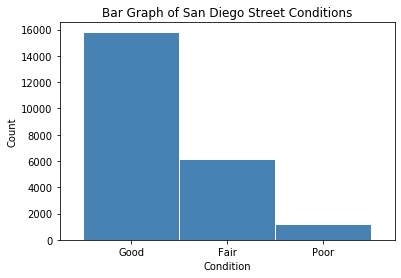

Good    15758
Fair     6105
Poor     1142
Name: oci_desc, dtype: int64

In [32]:
# accidents injury bar graph
conditions = df['oci_desc'].value_counts()
fig = plt.figure()
conditions.plot.bar(x ='lab', y='val', rot=0, width=0.99, 
                         color="steelblue")
plt.title ('Bar Graph of San Diego Street Conditions')
plt.xlabel('Condition') 
plt.ylabel('Count')
plt.show()

conditions

In [26]:
# cast oci info into range of values
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 100, 10) ]
df['OCI Range'] = pd.cut(df.oci, range(0, 105, 10), 
                                right=False, 
                                labels=labels).astype(object)
# inspect the new dataframe with this info
df[['oci', 'OCI Range']]

,oci,OCI Range
0,34.14,30 - 35
1,97.25,90 - 95
2,62.67,60 - 65
3,68.86,60 - 65
4,28.67,20 - 25
...,...,...
23000,93.40,90 - 95
23001,91.01,90 - 95
23002,97.26,90 - 95
23003,95.00,90 - 95


In [27]:
print("\033[1m"+'Street Conditions by Condition Index Range'+"\033[1m")
def oci_cond():
    oci_desc_good = df.loc[df.oci_desc == 'Good'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_good.rename(columns = {'oci_desc':'Good'}, inplace=True)

    oci_desc_fair = df.loc[df.oci_desc == 'Fair'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_fair.rename(columns = {'oci_desc':'Fair'}, inplace=True)

    oci_desc_poor = df.loc[df.oci_desc == 'Poor'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_poor.rename(columns = {'oci_desc':'Poor'}, inplace=True)

    oci_desc_comb = pd.concat([oci_desc_good, oci_desc_fair, oci_desc_poor], 
    axis = 1)
    # sum row totals
    oci_desc_comb.loc['Total']= oci_desc_comb.sum(numeric_only=True, axis=0)
    # sum column totals
    oci_desc_comb.loc[:,'Total'] = oci_desc_comb.sum(numeric_only=True, axis=1)

    oci_desc_comb.fillna(0, inplace = True)
    return oci_desc_comb.style.format("{:,.0f}")

oci_cond = oci_cond().data # retrieve dataframe
oci_cond

Street Conditions by Condition Index Range


,Good,Fair,Poor,Total
70 - 75,4766.0,3.0,0.0,4769.0
80 - 85,7341.0,0.0,0.0,7341.0
90 - 95,3541.0,0.0,0.0,3541.0
40 - 45,0.0,1095.0,0.0,1095.0
50 - 55,0.0,1685.0,0.0,1685.0
60 - 65,0.0,3322.0,0.0,3322.0
0 - 5,0.0,0.0,37.0,37.0
10 - 15,0.0,0.0,135.0,135.0
20 - 25,0.0,0.0,259.0,259.0
30 - 35,0.0,0.0,711.0,711.0


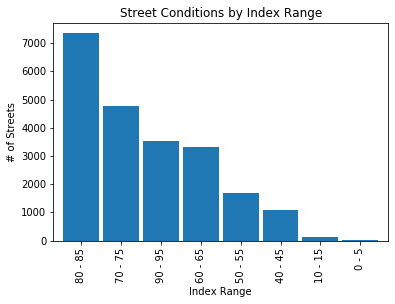

In [28]:
oci_plt = oci_cond['Total'][0:8].sort_values(ascending=False)
oci_plt.plot(kind='bar', width=0.90)
plt.title('Street Conditions by Index Range')
plt.xlabel('Index Range')
plt.ylabel('# of Streets')
plt.show()

### Distributions

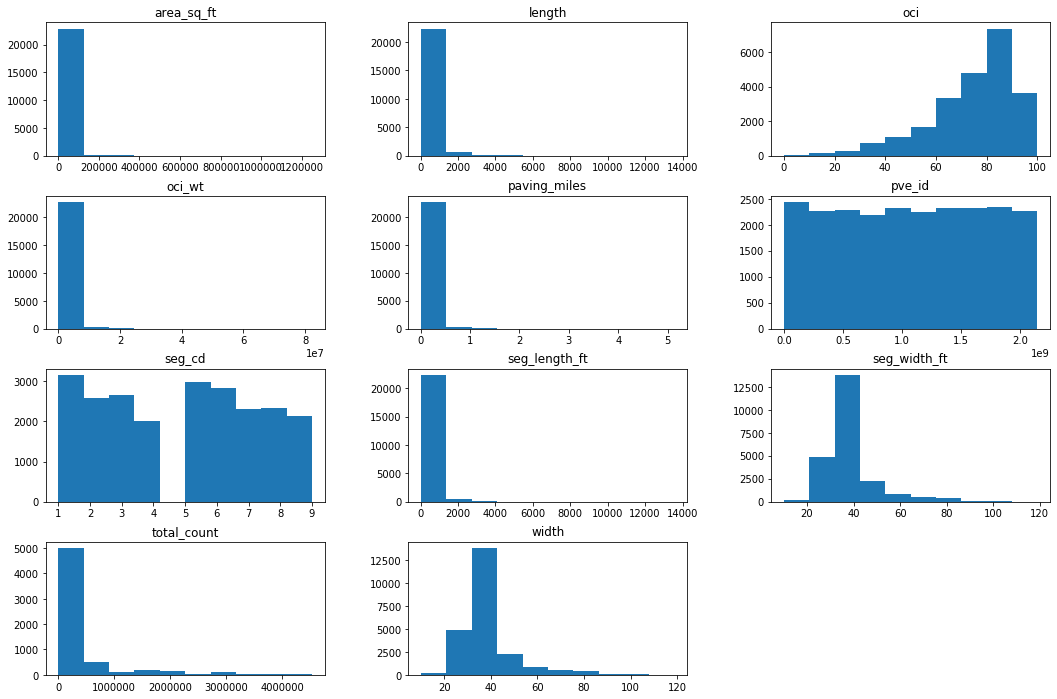

In [39]:
df.hist(grid=False, figsize=(18,12))
plt.show()